# Part 1 

### Goal: Use SVD to understand lantent features in data. In this case, latent features can be genre or styles. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
data = pd.read_csv('data/book_reviews.csv')
data.head()

User-ID        ISBN  Book-Rating
0   277195  0060391626           10
1   277195  0060502258            0
2   277195  0060987561            0
3   277195  0316666343            0
4   277195  0316734837            0

#### Create feature matrix 

In [151]:
feature_matrix = data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
feature_matrix = feature_matrix.fillna(-1)

#### Fill N/As with -1

In [174]:
A = feature_matrix.fillna(-1)

#### SVD 

- m: # of users
- n: # of items
- k: # of latent features (also rank of A)
- A is our user-book rating matrix (m x n)
- U is our weights matrix (m x k) --> users x lantent features 
- S is our singular values matrix (k x k) -->  lantent features on diagnol 
- V* is our features matrix (k x n) --> lantent features x items

#### Decompose feature matrix into u, s, v*

In [156]:
u, s, vh = np.linalg.svd(A, full_matrices=True)

In [45]:
u.shape, s.shape, vh.shape

((2500, 2500), (2500,), (6092, 6092))

In [67]:
# power = variance of a dimension 
power = s**2

Text(0.5, 0, 'Lantent feautes (k)')

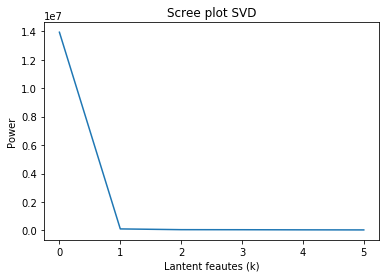

In [77]:
X = np.arange(0,6)
y = power[:6]
plt.plot(X,y)
plt.title('Scree plot SVD')
plt.ylabel('Power')
plt.xlabel('Lantent feautes (k)')

Text(0.5, 0, 'Lantent feautes (k)')

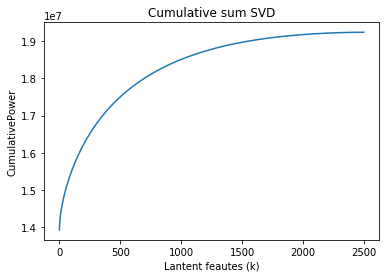

In [83]:
power_cum = power.cumsum()
X = np.arange(0,2500)
plt.plot(X,power_cum)
plt.title('Cumulative sum SVD')
plt.ylabel('CumulativePower')
plt.xlabel('Lantent feautes (k)')

In [100]:
np.where(power_cum/ power.sum() >= .9)
## need 441 singular values to get 90% of power 

(array([ 441,  442,  443, ..., 2497, 2498, 2499]),)

### Look at V to find which books most contribute to each 'topic'. For each of these 'topics', print out the title and author of the 10 most relevant books

-V shows us how much of each book contributes to the latent features

##### Getting indexs for books that have largest values/ contribute the most to each topic

In [293]:
mat = (vh)[:10]
idx = np.argsort(mat)[::-1][:,:10]

#### import meta data 

In [ ]:
meta_data = pd.read_csv('data/book_meta.csv', sep=";", error_bad_lines=False, encoding='latin1')

#### Indexing into dataframe to get ISBN number, then indexing into meta data to get book name by topic. Storing in dictionary by topic

In [311]:

dd = defaultdict(list)
for i in range(0, idx.shape[0]):
    for values in idx[i]:
        ISBN = A.iloc[:,values].name
        book_title = meta_data['Book-Title'][meta_data['ISBN'] == ISBN].item()
        dd[i].append(book_title)
        
        

ValueError: can only convert an array of size 1 to a Python scalar

In [312]:
dd

defaultdict(list,
            {0: ['The Lovely Bones: A Novel',
              'The Vampire Lestat (Vampire Chronicles, Book II)',
              'Born in Shame',
              'Interview with the Vampire',
              'Tears of the Moon (Irish Trilogy)',
              'Dance upon the Air (Three Sisters Island Trilogy)',
              'Heart of the Sea (Irish Trilogy)',
              'Ceremony in Death (Eve Dallas Mysteries (Paperback))',
              'The Queen of the Damned (Vampire Chronicles (Paperback))',
              'Irish Hearts'],
             1: ["The Handmaid's Tale",
              'A Prayer for Owen Meany',
              'Jurassic Park',
              'Roses Are Red (Alex Cross Novels)',
              'The Lovely Bones: A Novel',
              'Angels &amp; Demons',
              'Snow Falling on Cedars',
              'Kiss the Girls',
              'Bel Canto: A Novel',
              'Flesh and Blood'],
             2: ['Three To Get Deadly : A Stephanie Plum Novel (A S

# Part 2: 

### Goal: Visualizing High Dimensional Data 

#### Multi deminsional scaling is used in information visualization to display the information contained in a distance matrix. It is a form of non-linear dimensionality reduction.

In [70]:
from scipy.spatial import distance
from scipy.spatial.distance import pdist 

In [27]:
s1= pd.read_csv('data/senate/s101.csv')
s1.columns[0][0]

'U'

#### Load in the data, making one data frame for each session

In [20]:
session_dic = {'session 1': pd.read_csv('data/senate/s101.csv'), 
               'session 2': pd.read_csv('data/senate/s102.csv'), 
               'session 3': pd.read_csv('data/senate/s103.csv'),
               'session 4': pd.read_csv('data/senate/s104.csv'),
               'session 5': pd.read_csv('data/senate/s105.csv'),
              'session 6': pd.read_csv('data/senate/s106.csv'),
              'session 7': pd.read_csv('data/senate/s107.csv'),
              'session 8': pd.read_csv('data/senate/s108.csv'),
              'session 9': pd.read_csv('data/senate/s109.csv'),
              'session 10': pd.read_csv('data/senate/s110.csv'),
              'session 11': pd.read_csv('data/senate/s111.csv'),}

#### Voting code is on a more complex 0-9 scale, so put them on a Yay (1), Nay (-1), abstain (0) scale

- 1,2,3 -> 1
- 4,5,6 -> -1
- 7,8,9,0 -> 0

In [33]:
mapper = {1:1,2:1, 3:1, 4:-1, 5:-1, 6:-1, 7:0, 8:0, 9:0, 0:0}

def transformer(df):
    cols =  [ c for c in df.columns if c[0].lower() == 'v']
    df[cols] = df[cols].applymap(lambda x: mapper[x])
    
for session in session_dic:
    transformer(session_dic[session])

In [56]:
session_dic['session 1'].iloc[:,9:].head()

name  V1  V2  V3  V4  V5  V6  V7  V8  V9  ...  V629  V630  V631  \
0  BUSH          1   1   1   1   1   1   1   1   1  ...     0     0     0   
1  SHELBY, RIC   1   1   1   1   1   1   1   1   1  ...     1     1     1   
2  HEFLIN, HOW   1   1   1   1   1   1   1   1   1  ...     1     1     1   
3  STEVENS, TH   1   1   1   1   1   1   1   1   1  ...     1     1     1   
4  MURKOWSKI,    1   1   1   1   1   1   1   1   1  ...     1     1     1   

   V632  V633  V634  V635  V636  V637  V638  
0     0     0     0     0     0     0     1  
1     1     1     1     1     1     1    -1  
2     1     1     1     1     1     1    -1  
3     1    -1    -1     1     1     1     1  
4     1    -1    -1     1     1     1    -1  

[5 rows x 639 columns]

#### We are now ready to compute our distances. Let us first start with the 101st session for now. Extract all rows that correspond to the 101 Senate and using scipy's pdist create a similarity matrix of our senators. Start with Euclidean for now.

In [93]:
s1 = pdist(session_dic['session 1'].iloc[:,10:], metric='euclidean')
roll = session_dic['session 1']

#### Pass this matrix into scikit's MDS to compute the scaling (remember to tell it you precomputed the distances).

In [73]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed').fit_transform(distance.squareform(s1))

#### Plot senators in 2D space

In [94]:
dem = np.where(roll.party == 100)[0]
rep = np.where(roll.party == 200)[0]
names = session_dic['session 1'].name.values

In [100]:
def plot_senate(mds):
    plt.figure(figsize = (12, 10))

    plt.plot(mds[:, 0], mds[:, 1], '.', alpha = 0)

    plt.title('Senators of the 101th Congress')

    for i in dem:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'blue',
                     alpha = 0.3)

    for i in rep:
        plt.annotate(names[i], (mds[i, 0], mds[i, 1]),
                     color = 'red',
                     alpha = 0.5)

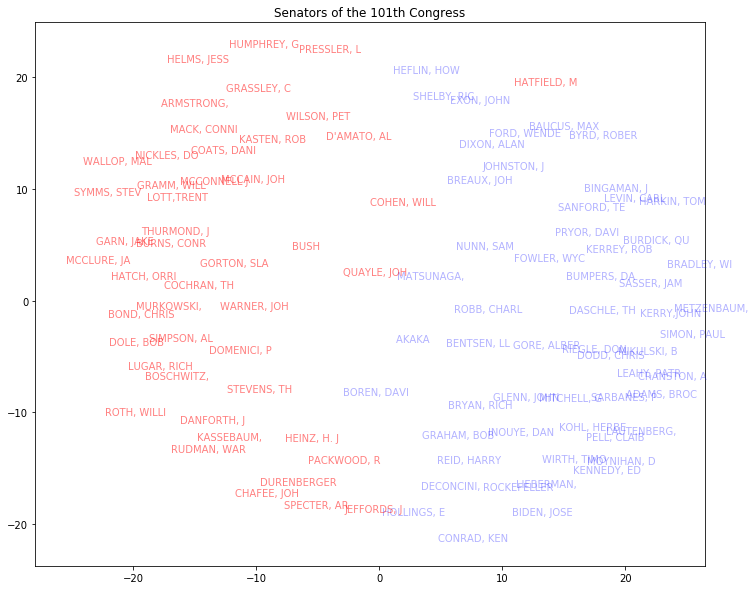

In [101]:
plot_senate(mds)

# PART 3: Congress ideology 4 fun

In [103]:
df = pd.read_csv('data/HS116_members.csv')

In [109]:
df[df['party_code'] == 100]['nominate_dim1'].mean()

-0.44095357142857133

In [112]:
df[df['party_code'] == 200]['nominate_dim1'].mean()

0.5026666666666664

In [111]:
df.head()

congress chamber  icpsr  state_icpsr  district_code state_abbrev  \
0       116   House  20301           41              3           AL   
1       116   House  21102           41              7           AL   
2       116   House  21192           41              2           AL   
3       116   House  21193           41              5           AL   
4       116   House  21376           41              1           AL   

   party_code  occupancy  last_means              bioname  ... died  \
0         200        NaN         NaN  ROGERS, Mike Dennis  ...  NaN   
1         100        NaN         NaN        SEWELL, Terri  ...  NaN   
2         200        NaN         NaN         ROBY, Martha  ...  NaN   
3         200        NaN         NaN           BROOKS, Mo  ...  NaN   
4         200        NaN         NaN       BYRNE, Bradley  ...  NaN   

   nominate_dim1  nominate_dim2  nominate_log_likelihood  \
0          0.340          0.452                -32.05041   
1         -0.391          0.403                 -8.99499   
2          0.372          0.680                -27.90088   
3          0.617         -0.454                -47.65055   
4          0.551          0.329                -27.08333   

   nominate_geo_mean_probability  nominate_number_of_votes  \
0                        0.83772                     181.0   
1                        0.95446                     193.0   
2                        0.86276                     189.0   
3                        0.77818                     190.0   
4                        0.86382                     185.0   

   nominate_number_of_errors  conditional  nokken_poole_dim1  \
0                       10.0          NaN              0.459   
1                        5.0          NaN             -0.575   
2                        7.0          NaN              0.526   
3                       21.0          NaN              0.729   
4                        9.0          NaN              0.614   

   nokken_poole_dim2  
0              0.499  
1              0.538  
2              0.850  
3             -0.521  
4              0.411  

[5 rows x 22 columns]

Text(0.5, 1.0, 'Ideology scores dem vs. rep')

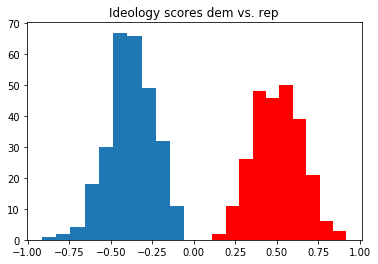

In [129]:
plt.hist(df[df['party_code'] == 100]['nominate_dim1'])
plt.hist(df[df['party_code'] == 200]['nominate_dim1'], color='red')
plt.title('Ideology scores dem vs. rep')